In [2]:
CREATE TABLE test_db.dbo.Customers
(ID INT PRIMARY KEY , 
 CustomerName VARCHAR(50), 
 CustomerAge  SMALLINT, 
 CustomerCountry  VARCHAR(50)
)
 

: Msg 2714, Level 16, State 6, Line 1
There is already an object named 'Customers' in the database.

Total execution time: 00:00:00.016

In [3]:
INSERT INTO test_db.[dbo].[Customers]([ID],[CustomerName],[CustomerAge],[CustomerCountry]) VALUES (1,N'Salvador',23,N'Brazil ')
INSERT INTO test_db.[dbo].[Customers]([ID],[CustomerName],[CustomerAge],[CustomerCountry]) VALUES (2,N'Lawrence',60,N'China ')
INSERT INTO test_db.[dbo].[Customers]([ID],[CustomerName],[CustomerAge],[CustomerCountry]) VALUES (3,N'Ernest',38,N'India')

select * from test_db.dbo.Customers


(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.006

(3 rows affected)

Total execution time: 00:00:00.035

ID,CustomerName,CustomerAge,CustomerCountry
1,Salvador,23,Brazil
2,Lawrence,60,China
3,Ernest,38,India


Option 1

In [5]:
CREATE TABLE  test_db.dbo.CustomerOrders
(ID INT PRIMARY KEY ,
 OrderDate DATETIME, 
 CustomerID INT FOREIGN KEY REFERENCES test_db.dbo.Customers(ID), 
 Amout   BIGINT, 
)

ALTER TABLE [test_db].[dbo].CustomerOrders
ADD CONSTRAINT FK_CustomerCheck FOREIGN KEY (CustomerID)  REFERENCES Customers(ID)

Commands completed successfully.

Total execution time: 00:00:00.038

Option 2 with <span style="color: rgb(0, 0, 255); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">FOREIGN&nbsp;KEY </span> name

In [12]:
CREATE TABLE test_db.dbo.CustomerOrders
(ID INT PRIMARY KEY,
 OrderDate DATETIME, 
 CustomerID INT,
 Amout   BIGINT
)

ALTER TABLE [test_db].[dbo].CustomerOrders
ADD CONSTRAINT FK_CustomerCheck FOREIGN KEY (CustomerID)  REFERENCES Customers(ID)

Commands completed successfully.

Total execution time: 00:00:00.013

In [13]:
INSERT INTO [test_db].[dbo].[CustomerOrders]([ID],[OrderDate],[CustomerID],[Amout]) VALUES (1,CAST('29-Apr-2019' AS DATETIME),1,968.45)
INSERT INTO [test_db].[dbo].[CustomerOrders]([ID],[OrderDate],[CustomerID],[Amout]) VALUES (2,CAST('10-May-2019' AS DATETIME),2,898.36)
INSERT INTO [test_db].[dbo].[CustomerOrders]([ID],[OrderDate],[CustomerID],[Amout]) VALUES (3,CAST('21-Oct-2019' AS DATETIME),3,47.01)
 
SELECT * FROM [test_db].[dbo].[CustomerOrders]

(1 row affected)

(1 row affected)

(1 row affected)

(3 rows affected)

Total execution time: 00:00:00.051

ID,OrderDate,CustomerID,Amout
1,2019-04-29 00:00:00.000,1,968
2,2019-05-10 00:00:00.000,2,898
3,2019-10-21 00:00:00.000,3,47


In [14]:
INSERT INTO  [test_db].[dbo].[CustomerOrders]([ID],[OrderDate],[CustomerID],[Amout]) 
VALUES (4,CAST('29-Apr-2019' AS DATETIME),4,968.45)

: Msg 547, Level 16, State 0, Line 1
The INSERT statement conflicted with the FOREIGN KEY constraint "FK_CustomerCheck". The conflict occurred in database "test_db", table "dbo.Customers", column 'ID'.

The statement has been terminated.

Total execution time: 00:00:00.006

## **Foreign key update and delete rules**

### Delete Rules:

- **No Action:** It returns an error when we want to delete any row from the parent table and the deleted statement will be rolled back
- **Cascade**: In this option, the deleted statement also deletes all associated rows from the child table
- **Set Null**: In this option, the deleted statement deletes the parent table row and associated values will be updated with null values on the child table. The foreign key column must be nullable
- **Set Default**: The delete statement deletes parent table row and associated values of the child table will be updated with the default value of the foreign key column. In order to work this rule, a default constraint should be specified for the foreign key column and this default value must match in the parent table

### Update Rules:

- **No Action**: It returns an error when we want to update any row from the parent table and the update statement will be rolled back
- **Cascade**: In this option, the updated statement also updates all associated rows from the child table
- **Set Null**: In this option, the updated statement updates the parent table data and the associated values of the child table are updated to a default value. The foreign key column must be nullable
- **Set Default**: The update statement updates the parent table row and child table associated values will be updated with the default value of the foreign key column. In order to work this rule, a default constraint should be specified for the foreign key column and this default value must match in the parent table

In the following example, we will create a **CustomerSales** table and this table **CustomerId** column referencing **ID** column of the **Customers** table. The delete rule of the foreign key will be specified as **No Action** and the update rule will be specified as **Set Null** option.

In [16]:
CREATE TABLE [test_db].[dbo].CustomerSales
(ID  INT
 PRIMARY KEY,
 SaleDate DATETIME, 
 CustomerID INT FOREIGN KEY REFERENCES Customers(ID) ON UPDATE CASCADE  ON DELETE NO ACTION, 
 SaleAmount MONEY,
)

Commands completed successfully.

Total execution time: 00:00:00.029

In [17]:
INSERT INTO [test_db].[dbo].[CustomerSales]([ID],[SaleDate],[CustomerID],[SaleAmount]) VALUES (1,CAST('05-Mar-2019' AS DATETIME),1,726.24)
INSERT INTO [test_db].[dbo].[CustomerSales]([ID],[SaleDate],[CustomerID],[SaleAmount]) VALUES (2,CAST('02-Nov-2019' AS DATETIME),2,817.33)
INSERT INTO [test_db].[dbo].[CustomerSales]([ID],[SaleDate],[CustomerID],[SaleAmount]) VALUES (3,CAST('13-Nov-2019' AS DATETIME),3,768.02)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.071

In [18]:
DELETE FROM [test_db].[dbo].Customers WHERE Id=2


: Msg 547, Level 16, State 0, Line 1
The DELETE statement conflicted with the REFERENCE constraint "FK_CustomerCheck". The conflict occurred in database "test_db", table "dbo.CustomerOrders", column 'CustomerID'.

The statement has been terminated.

Total execution time: 00:00:00.026

<span style="color: rgb(37, 37, 37); font-family: &quot;Segoe UI&quot;, Tahoma, Arial; background-color: rgb(255, 255, 255);">As we can see, the foreign key rule prevents deleting the referenced column value. Now, we will update a row of the&nbsp;</span> **Customers** <span style="color: rgb(37, 37, 37); font-family: &quot;Segoe UI&quot;, Tahoma, Arial; background-color: rgb(255, 255, 255);">&nbsp;(parent table value).</span>

In [19]:
DELETE [test_db].[dbo].CustomerOrders
SELECT * FROM [test_db].[dbo].Customers
SELECT * FROM [test_db].[dbo].CustomerSales
UPDATE [test_db].[dbo].Customers SET ID=9999 WHERE ID=1
SELECT * FROM [test_db].[dbo].Customers
SELECT * FROM [test_db].[dbo].CustomerSales

(3 rows affected)

(3 rows affected)

(3 rows affected)

(1 row affected)

(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.078

ID,CustomerName,CustomerAge,CustomerCountry
1,Salvador,23,Brazil
2,Lawrence,60,China
3,Ernest,38,India


ID,SaleDate,CustomerID,SaleAmount
1,2019-03-05 00:00:00.000,1,"726,2400"
2,2019-11-02 00:00:00.000,2,"817,3300"
3,2019-11-13 00:00:00.000,3,"768,0200"


ID,CustomerName,CustomerAge,CustomerCountry
2,Lawrence,60,China
3,Ernest,38,India
9999,Salvador,23,Brazil


ID,SaleDate,CustomerID,SaleAmount
1,2019-03-05 00:00:00.000,9999,"726,2400"
2,2019-11-02 00:00:00.000,2,"817,3300"
3,2019-11-13 00:00:00.000,3,"768,0200"


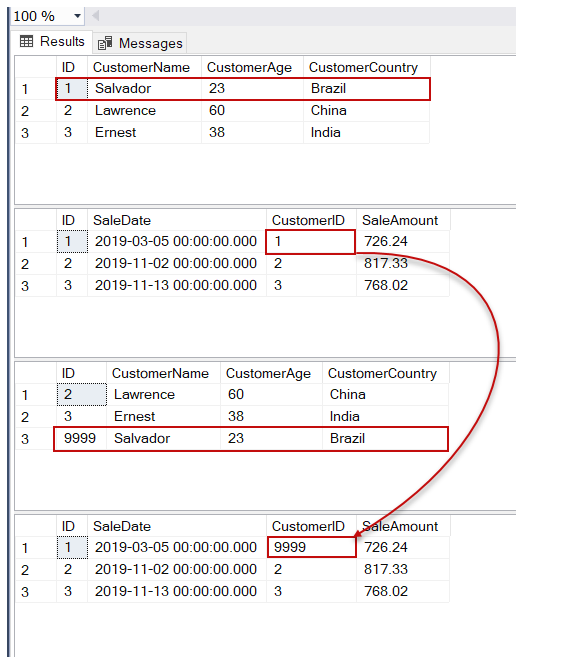